<a href="https://colab.research.google.com/github/AsadBukhari886/foundations_of_artificial_neural_network/blob/main/Class_13_14_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

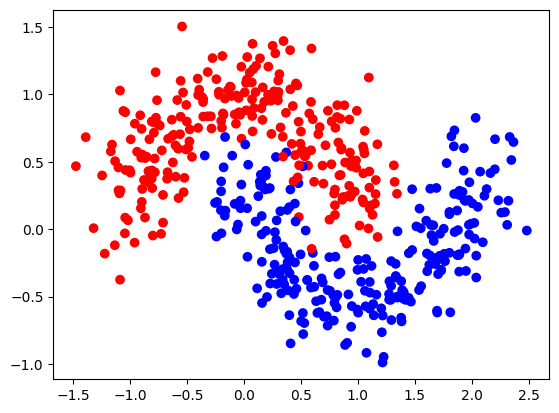

In [ ]:
X, y = make_moons(n_samples=500, noise=0.20, random_state=42)
X = X.astype(np.float32)
y = y.astype(np.float32).reshape(-1, 1)

plt.scatter(X[:,0], X[:, 1], c=y, cmap = 'bwr_r')

In [ ]:
X.shape

(500, 2)

In [ ]:
def sigmoid(z):
  return 1 / (1+ np.exp(-z))


def BCELoss(y_hat, y):
  eps = 1e-6
  return - np.mean(y * np.log(y_hat +eps) + (1-y) * np.log(1 - y_hat + eps))

In [ ]:
# n1
w11 = np.random.randn(1,2)
b11 = 0

# n2
w12 = np.random.randn(1,2)
b12 = 0

# n1
w21 = np.random.randn(1,2)
b21 = 0




In [ ]:
w21

array([[-0.66781668, -1.48629198]])

In [ ]:
def relu(z):
  return np.maximum(z, 0)

def relu_backward(dl, z):
  return dl * (z>0).astype(int)

In [ ]:
# forward

def forward(X):
  z11 = X @ w11.T + b11
  o11 = relu(z11)

  z12 = X @ w12.T + b12
  o12 = relu(z12)

  o = np.hstack((o11, o12))


  z21 = o @ w21.T + b21
  y_hat = sigmoid(z21)

  return y_hat, o, o11, o12, z11, z12






# Class 14

In [ ]:
# # Training/ Backpropagation

lr =0.1
for i in range(5000):
  y_hat, o, o11, o12, z11, z12  = forward(X)
  loss = BCELoss(y_hat, y)


  n = X.shape[0]
  dL = (y_hat - y)/n

  #n3
  dw21 = dL.T @ o
  db21 = np.sum(dL)



# When Activation functoin is sigmoid in hidden layer.
  # n1
  # dL1 = dL * w21[0, 0]
  # dL1 = dL1 * o11 *(1- o11)
  # dw1 = dL1.T @ X
  # db1 = sum(dL1)


  # # n2
  # dL2 = dL * w21[0, 1]
  # dL1 = dL1 * o12 *(1- o12)
  # dw2 = dL2.T @ X
  # db2 = sum(dL2)



# When Activation functoin is relu in hidden layer.
#   # n1
  dL1 = dL * w21[0, 0]
  dL1 = relu_backward(dL1, z11)
  dw1 = dL1.T @ X
  db1 = sum(dL1)


# n2
  dL2 = dL * w21[0, 1]
  dL2 = relu_backward(dL2, z12)
  dw2 = dL2.T @ X
  db2 = sum(dL2)


  w21-=lr* dw21
  b21-=lr* db21

  w11-=lr* dw1
  b11-=lr* db1

  w12-=lr* dw2
  b12-=lr* db2






  if i%100 == 0:
    print(loss)
    # pass

0.8514717798584274
0.4242228764711991
0.33880681248487554
0.29606257483525983
0.2759776421050436
0.26488169632992015
0.25814518548130966
0.25333878769253304
0.24954427990722766
0.24634293725896178
0.24342343791218668
0.24068979343445884
0.23815068207268794
0.23569081685839469
0.2332983290382485
0.230957219246934
0.22866005295612263
0.22646000863417834
0.2243617010650479
0.22234822001958798
0.22058305107312048
0.2189533146539716
0.21749333510584404
0.2162099237868211
0.2151179241130738
0.2141160618054604
0.21324687858047678
0.212470148932638
0.2118142540047586
0.21124323245684284
0.21071006111454196
0.21020441224938213
0.2097695852603968
0.209392926989805
0.20905093952107884
0.20872386608294932
0.2084159317386181
0.2081487392163486
0.20791306556042202
0.20770332788447432
0.20751565151761459
0.20734764101934322
0.20719502837060957
0.20705042764867948
0.20691198991774226
0.2067781184384823
0.2066482608525156
0.2065216543661554
0.20640952879282798
0.20630629711161103


In [ ]:
print(w11)
print(w12)
print(w21)

[[ 2.53313506 -0.465275  ]]
[[0.20795673 1.45660419]]
[[ 0.30258411 -0.61790959]]


In [ ]:
print(w11)
print(w12)
print(w21)

[[ 1.58560702 -0.86197943]]
[[0.30387308 2.32349299]]
[[ 1.18858075 -2.18961576]]


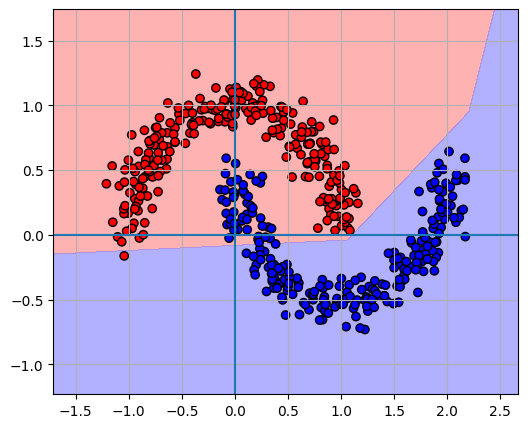

In [ ]:

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]
Z= forward(grid)[0]
Z = Z.reshape(xx.shape)

# ---------------------------
# Plot
# ---------------------------
plt.figure(figsize=(6, 5))

plt.contourf(xx, yy, Z, levels=0, cmap = 'bwr_r', alpha=0.6)
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y.squeeze(),
    cmap = 'bwr_r',
    edgecolors="k"
)

plt.axhline(0)
plt.axvline(0)
plt.grid(True)
plt.show()

In [ ]:
# forward

def forward_(X):
  z11 = X @ w11.T + b11
  o11 = relu(z11)

  z12 = X @ w12.T + b12
  o12 = relu(z12)

  o = np.hstack((o11, o12))

  z21 = o @ w21.T + b21
  y_hat = sigmoid(z21)

  return z21






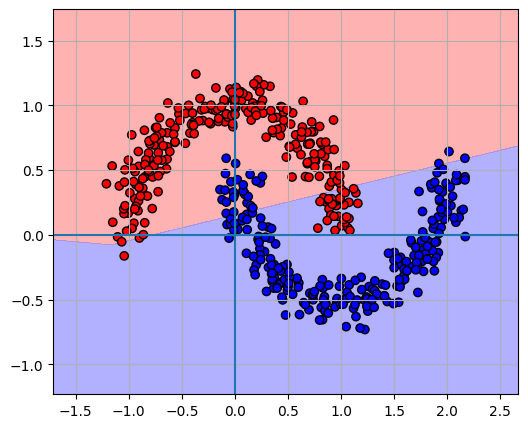

In [ ]:

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]
Z= forward_(grid)
Z = Z.reshape(xx.shape)

# ---------------------------
# Plot
# ---------------------------
plt.figure(figsize=(6, 5))

plt.contourf(xx, yy, Z, levels=1, cmap = 'bwr_r', alpha=0.6)
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y.squeeze(),
    cmap = 'bwr_r',
    edgecolors="k"
)

plt.axhline(0)
plt.axvline(0)
plt.grid(True)
plt.show()

# Automatic Way

In [ ]:
input_feature = 2


w1 = np.random.randn(16,input_feature)
b1 = np.zeros((1, 16))

w2 = np.random.randn(1, 16)
b2 = np.zeros((1, 1))


In [ ]:
# forward
# X = (500,2), w = (2,2)
def forward(X):
  z1 = X @ w1.T + b1
  o1 = relu(z1)

  z2 = o1 @ w2.T + b2
  y_hat = sigmoid(z2)
  return y_hat, o1, z1




In [ ]:
lr = 0.1

for i in range(5000):
  y_hat, o1, z1 = forward(X)
  loss = BCELoss(y_hat, y)


  n = X.shape[0]
  dL = (y_hat - y)/n

  #n3
  # dL = (n, 1)
  # dL = (1, n)

  # o1 = (n, 2)
  dw2 = dL.T @ o1
  db2 = np.sum(dL, keepdims=True, axis=0)


  # ---------------------Important part --------------------
  # dL = (500, 1)
  # w2 = (1, 2)


  dl1 = dL @ w2

  #----------------------------
  # Layer 1
  # dl1 = nx2
  # z1 = nx2
  dl1 = relu_backward(dl1, z1)

  # dl1 = (500, 2)
  # X = (500, 2)

  # w1 = (2,2)
  # dw1 = 2x2
  dw1 = dl1.T @ X
  db1 = np.sum(dl1, keepdims=True, axis=0)

  w2 -= lr* dw2
  b2 -= lr* db2

  w1 -= lr*dw1
  b1 -= lr* db1

  if i%100 ==0:
    print(loss)






0.5124871287250401
0.30387280096457536
0.2839282253643705
0.2680706297854437
0.2596841611833959
0.2515093399259834
0.24283199696541258
0.23357691670732134
0.22306639927872465
0.21203294878073597
0.19989582701236142
0.18802221072901323
0.1773125347126608
0.16695235675990236
0.15701137990727967
0.1474613637641893
0.13856938341763914
0.130467625971896
0.12307724581374407
0.11635085853962782
0.11021991598784805
0.10463330501783694
0.09969008814836125
0.09528485790628315
0.09129964308746265
0.08777721575697572
0.08467763881230113
0.08189796859187577
0.0793699509534288
0.07707402443461547
0.07497903809488961
0.0730925607259545
0.07136991483144663
0.06978507270670102
0.068327963583096
0.06698856278175087
0.06575199675052437
0.064609341004865
0.06355272242337864
0.06256434987432023
0.061400080101706674
0.05994480891875901
0.05859671568559392
0.057600370650349356
0.05663067975994849
0.05594857041503903
0.05531984823555017
0.05469932763734992
0.05383231911954016
0.05329667186850567


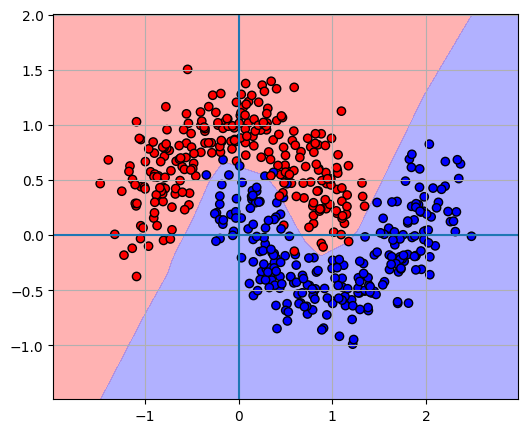

In [ ]:

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]
Z= forward(grid)[0]
Z = Z.reshape(xx.shape)

# ---------------------------
# Plot
# ---------------------------
plt.figure(figsize=(6, 5))

plt.contourf(xx, yy, Z, levels=1, cmap = 'bwr_r', alpha=0.6)
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y.squeeze(),
    cmap = 'bwr_r',
    edgecolors="k"
)

plt.axhline(0)
plt.axvline(0)
plt.grid(True)
plt.show()